<a href="https://colab.research.google.com/github/DiaHere/U.S.-Cities-Parks-Recreation-Data/blob/main/Cluster_Analysis_%26_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

- Dataset: data about parks in 100 popular cities in the United Stataes. The data was derived from the Trust of Public Land and has been redunced by professor Jordan.
- Purpose: Create cluster analysis of those parks by first preparing the data, visualize it, then interpret it

In [1]:
# Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.vq import vq, kmeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram

In [2]:
# Uploading the data
df = pd.read_csv('parks_data_2024.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City                        100 non-null    object 
 1   Population                  100 non-null    float64
 2   Acres per 1,000 people      100 non-null    float64
 3   Parks per 10,000 residents  100 non-null    float64
 4   Parks as % City Area        100 non-null    float64
 5   Fields/ Diamonds            100 non-null    float64
 6   Tennis_dedicdated           100 non-null    float64
 7   Pickleball_dedicated        100 non-null    float64
 8   Pickleball_combined         100 non-null    float64
 9   Hoops                       100 non-null    float64
 10  Community_garden_sites      100 non-null    float64
 11  Dog_parks                   100 non-null    float64
 12  Playgrounds                 100 non-null    float64
 13  Rec_senior_centers          100 non-

In [3]:
df

,City,Population,"Acres per 1,000 people","Parks per 10,000 residents",Parks as % City Area,Fields/ Diamonds,Tennis_dedicdated,Pickleball_dedicated,Pickleball_combined,Hoops,Community_garden_sites,Dog_parks,Playgrounds,Rec_senior_centers,Restrooms,Skateparks,Splashpads,Swimming_pools,Disc_golf_courses,investment_dollars
0,"Albuquerque, NM",553345.0,38.905204,5.692651,0.189322,3.560166,3.397519,1.012027,2.891505,5.060134,0.000000,3.975820,3.307159,1.120458,1.301177,0.000000,0.903595,0.000000,0.000000,220.434307
1,"Anaheim, CA",345538.0,13.344408,1.881125,0.143306,2.604634,1.504900,1.447019,1.447019,1.504900,0.011576,1.157615,1.736423,0.289404,1.736423,2.604634,0.578808,0.000000,0.000000,76.151009
2,"Anchorage, AK",288464.0,3022.196184,7.765267,0.801559,3.154640,2.357313,0.693327,0.693327,1.975983,0.017333,2.773310,3.119973,0.207998,1.559987,1.733319,0.000000,1.733319,0.693327,68.927449
3,"Arlington, TX",397158.0,10.869729,2.517890,0.070975,2.366816,1.208587,0.553936,1.410018,7.830637,0.002518,0.755367,4.230055,0.654651,1.938775,1.007156,2.014312,1.510734,0.503578,112.913565
4,"Arlington, VA",245695.0,7.263477,6.023729,0.112112,4.436395,7.326156,0.000000,1.628035,17.094365,0.040701,4.070087,5.453916,1.221026,2.401351,0.407009,2.849061,2.035043,0.407009,260.647703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Tulsa, OK",416599.0,19.502447,3.264530,0.065091,5.760936,5.664920,0.768125,0.864140,2.928476,0.007201,0.720117,4.320702,0.384062,1.368222,1.200195,8.401364,1.200195,2.160351,75.332502
96,"Virginia Beach, VA",461744.0,55.963911,0.021657,0.165060,2.425586,2.685471,2.468901,2.468901,7.103503,0.000000,1.082851,5.284313,0.303198,1.191136,0.649711,0.216570,1.515992,0.649711,107.815311
97,"Washington, DC",698878.0,13.294738,3.419767,0.238217,2.189223,5.008027,0.429259,1.030223,6.968312,0.221784,2.718643,2.017520,2.003211,2.847421,0.858519,5.294200,4.721854,0.143086,485.292066
98,"Wichita, KS",381998.0,10.731077,3.036665,0.040266,2.827240,3.455515,1.623045,1.623045,3.219912,0.005236,1.308907,2.277499,0.471207,2.094252,1.047126,3.141378,1.570689,1.832470,82.474460




---



# **PART 1**: Cluster Analysis of Parks & Facilities Data

*   **Creating k-means and hierarchical clustering analysis**

# **K-means Cluster Analysis**

*   **Question:** whats the difference in numbers between Hoop and Pickleball_combined in those cities?
*   **Features:**

  *   'Hoops': The number of basketball hoops (not courts) per 10,000 residents
  *   'Pickleball_combined': The number of pickleball/tennis combined courts per 20,000 residents




# Prepare the Data

**Hoops are calculated per 10,000 resident while Pickleball_combined is caluculated per 20,000.**

*Now make it equal*

In [4]:
# Multiplying Hoops by 2 to make it per 20,000 residents
df['Hoops'] = df['Hoops'] * 2
df['Hoops']

,Hoops
0,10.120269
1,3.009799
2,3.951966
3,15.661273
4,34.188730
...,...
95,5.856951
96,14.207006
97,13.936624
98,6.439824


In [5]:
#Observing the two features
df_features = df[['Hoops','Pickleball_combined']].copy()
df_features.head(10)

,Hoops,Pickleball_combined
0,10.120269,2.891505
1,3.009799,1.447019
2,3.951966,0.693327
3,15.661273,1.410018
4,34.188730,1.628035
5,7.792128,1.890170
6,3.831711,0.919611
7,4.868174,0.842174
8,4.709046,3.155547
9,7.808633,0.488040


**The values seems to not be scalled correctly/equally to the standard deviation.**


*Normalizing the two features to make the scatterplot possible*

In [6]:
df_features['Hoops_scaled'] = df_features['Hoops'] / df_features['Hoops'].std()
df_features['Pickleball_combined_scaled'] = df_features['Pickleball_combined'] / df_features['Pickleball_combined'].std()
df_features[['Hoops_scaled','Pickleball_combined_scaled']].head(10)

,Hoops_scaled,Pickleball_combined_scaled
0,1.333337,2.638993
1,0.396539,1.320652
2,0.520668,0.632780
3,2.063360,1.286883
4,4.504337,1.485860
5,1.026607,1.725103
6,0.504825,0.839302
7,0.641378,0.768627
8,0.620413,2.879976
9,1.028781,0.445420


# Clustering

**k-means clustering analysis**

*Figure out the number clusters using hte elbow plot method*

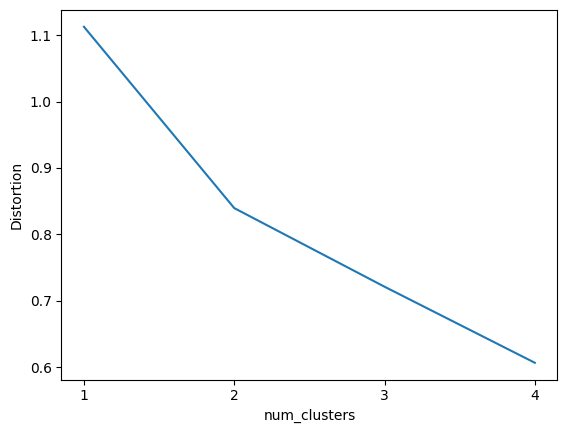

In [7]:
distortions = [] # the list of disortion between every cluster center
num_clusters = range(1,5) # a range of numbers

for i in num_clusters:
  cluster_center, distortion = kmeans(df_features[['Hoops_scaled', 'Pickleball_combined_scaled']], i)
  distortions.append(distortion) # addes the distortions distance from different numbers of clusters possiblities

elbow_plot = pd.DataFrame({'num_clusters' : num_clusters, 'Distortion': distortions}) # create an elbow plot dataframe

#finding the most optimal number of clusters based on the distortion
sns.lineplot(x = 'num_clusters', y = 'Distortion', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

**Most optimal number of clusters is 2**

*Using the number, I can create the cluster centers and the labels for the graph*

In [8]:
cluster_centers, distortions = kmeans(df_features[['Hoops_scaled', 'Pickleball_combined_scaled']], 2) #Creating 2 clusters

df_features['cluster_labels'], distortions = vq(df_features[['Hoops_scaled', 'Pickleball_combined_scaled']], cluster_centers) #Labeling the clusters

*Now, create the graph of those clusters*

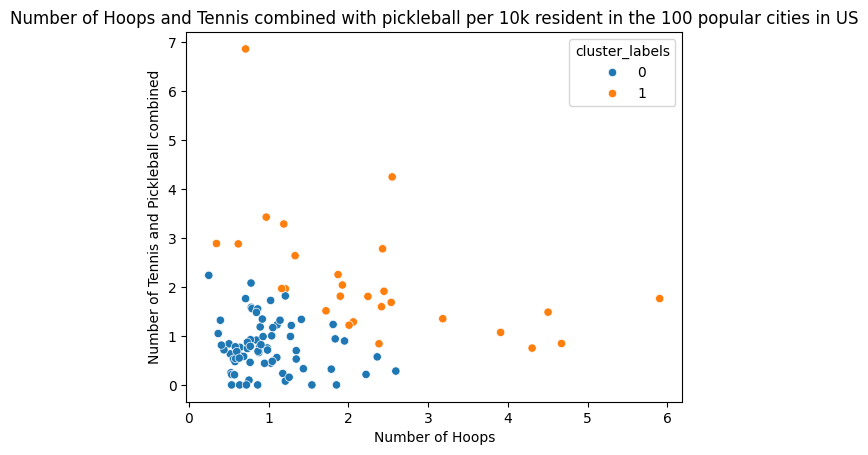

In [9]:
sns.scatterplot(x = 'Hoops_scaled', y = 'Pickleball_combined_scaled', hue = df_features['cluster_labels'],
                data = df_features[['Hoops_scaled', 'Pickleball_combined_scaled']]) #Creating a scatterplot of the clusters
#Editing the plot
plt.xlabel('Number of Hoops')
plt.ylabel('Number of Tennis and Pickleball combined')
plt.title('Number of Hoops and Tennis combined with pickleball per 10k resident in the 100 popular cities in US')
plt.show()

**Interpretations:**


*   It mostly ranges from 1 - 3 hoops and pickleball equally for most cities
*   However, as the number of hoops increase (which is present for couple of cities only), there is less pickleball combined - a weak negative correlation







---



# **hierarchical Clustering Analysis**



*   **Question:** Does the number of senior centers increase as the investemnt money increase and vice versa? Is there a possitive correlation between the two?
*   **Features:**
  *     'Rec_senior_centers': Recreation and Senior Center facilities per 20,000 residents
  *      'Investment_dollars': The amount spent, annually, on parks per resident, adjusted for cost of living differences, and including volunteer hours






# Prepare the Data

**Investment_dollars is measured per resident while the Rec_senior_centers per 20,000 resident***

**Lets equlize them by multiplying the invested money by 20,000**

In [10]:
#Creating a dataframe for those features only
df_features2 = df[['investment_dollars', 'Rec_senior_centers']].copy()
df_features2

,investment_dollars,Rec_senior_centers
0,220.434307,1.120458
1,76.151009,0.289404
2,68.927449,0.207998
3,112.913565,0.654651
4,260.647703,1.221026
...,...,...
95,75.332502,0.384062
96,107.815311,0.303198
97,485.292066,2.003211
98,82.474460,0.471207


In [11]:
#equlizing the scale
df_features2['investment_dollars_per_20k'] = df_features2['investment_dollars'] * 20000
df_features2

,investment_dollars,Rec_senior_centers,investment_dollars_per_20k
0,220.434307,1.120458,4.408686e+06
1,76.151009,0.289404,1.523020e+06
2,68.927449,0.207998,1.378549e+06
3,112.913565,0.654651,2.258271e+06
4,260.647703,1.221026,5.212954e+06
...,...,...,...
95,75.332502,0.384062,1.506650e+06
96,107.815311,0.303198,2.156306e+06
97,485.292066,2.003211,9.705841e+06
98,82.474460,0.471207,1.649489e+06


In [12]:
df_features2.describe()

,investment_dollars,Rec_senior_centers,investment_dollars_per_20k
count,100.000000,100.000000,1.000000e+02
mean,155.457990,0.918374,3.109160e+06
std,126.480333,0.556556,2.529607e+06
min,23.093246,0.175745,4.618649e+05
25%,93.195634,0.493665,1.863913e+06
50%,126.808236,0.773213,2.536165e+06
75%,184.703603,1.222209,3.694072e+06
max,1067.040552,3.166478,2.134081e+07


**To be able to cluster, I have to normalize the values from 0 to 1 to have the same scale**

In [13]:
#Normalize the two features
df_features2['investment_dollars_per_20k_scaled'] = df_features2['investment_dollars_per_20k'] / df_features2['investment_dollars_per_20k'].std()
df_features2['Rec_senior_centers_scaled'] = df_features2['Rec_senior_centers'] / df_features2['Rec_senior_centers'].std()
df_features2

,investment_dollars,Rec_senior_centers,investment_dollars_per_20k,investment_dollars_per_20k_scaled,Rec_senior_centers_scaled
0,220.434307,1.120458,4.408686e+06,1.742835,2.013198
1,76.151009,0.289404,1.523020e+06,0.602078,0.519990
2,68.927449,0.207998,1.378549e+06,0.544966,0.373724
3,112.913565,0.654651,2.258271e+06,0.892736,1.176253
4,260.647703,1.221026,5.212954e+06,2.060777,2.193895
...,...,...,...,...,...
95,75.332502,0.384062,1.506650e+06,0.595606,0.690069
96,107.815311,0.303198,2.156306e+06,0.852427,0.544776
97,485.292066,2.003211,9.705841e+06,3.836897,3.599295
98,82.474460,0.471207,1.649489e+06,0.652073,0.846647


# Cluster

**Hierarchical cluster analysis**

In [14]:
#Figuring out the distance matrix using linkage
distance = linkage(df_features2[['investment_dollars_per_20k_scaled','Rec_senior_centers_scaled']], method = 'ward', metric = 'euclidean')

**Before labeling the clusters, I need to figure out the number of clusters using a dendogram**

*Using Dendrogram to figure out the most optimal number of clusters*

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [45.0, 45.0, 55.0, 55.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [50.0, 50.0, 72.5, 72.5],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [102.5, 102.5, 132.5, 132.5],
  [61.25, 61.25, 117.5, 117.5],
  [13.75, 13.75, 89.375, 89.375],
  [155.0, 155.0, 165.0, 165.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [160.0, 160.0, 182.5, 182.5],
  [205.0, 205.0, 215.0, 215.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [210.0, 210.0, 232.5, 232.5],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [255.0, 255.0, 272.5, 272.5],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [263.75, 263.75, 302.5, 302.5],
  [221.25, 221.25, 283.125, 283.125],
  [171.25, 171.25, 252.1875, 252.1875],
  [325.0, 325.0, 335.0, 335.0],
  [355.0, 35

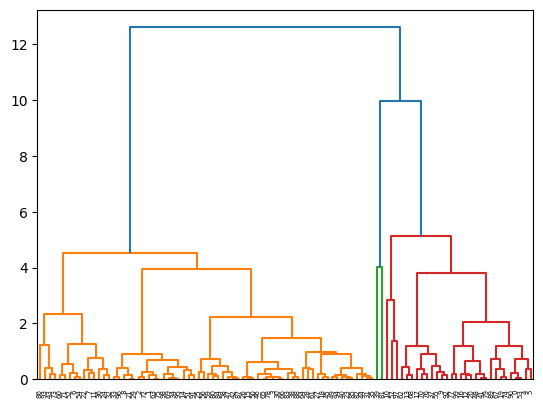

In [15]:
dendrogram(distance)

**The most optimal number of cluster based on the dendrogram is 3**

*Now create the cluster labels*

In [16]:
df_features2['cluster_labels'] = fcluster(distance, 3, criterion='maxclust')

*Creating the scatterplot based on the cluster labels*

Text(0.5, 1.0, 'Money Invested and Recreational & Senior Centers Ratio per 20k resident in 100 popular cities in US')

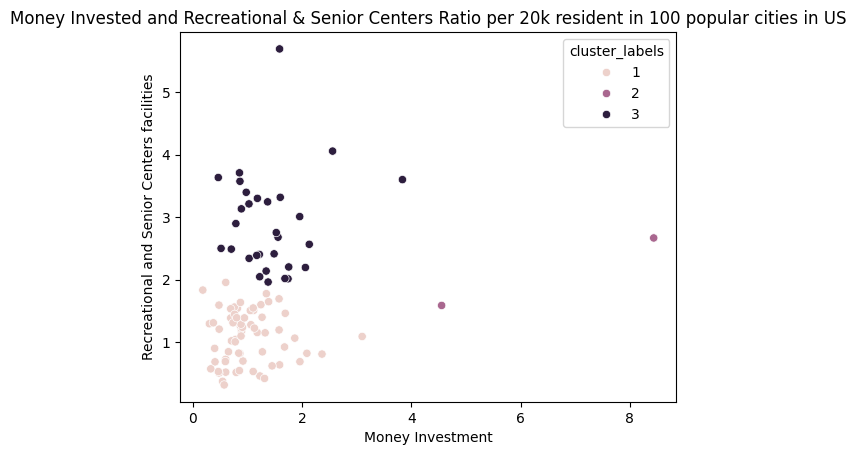

In [17]:
sns.scatterplot(x = 'investment_dollars_per_20k_scaled', y = 'Rec_senior_centers_scaled', hue = 'cluster_labels',
                data = df_features2) #Create the scatter plot with the cluster labeling
#Editing the plot
plt.xlabel('Money Investment')
plt.ylabel('Recreational and Senior Centers facilities')
plt.title('Money Invested and Recreational & Senior Centers Ratio per 20k resident in 100 popular cities in US')

**interpretations**:


*   There are two groups of cities with the same amount of money invested (0-2) that have different ratios between the two features: cluster two has a Recreational and Senior Center facilities 0 - 2; on the other side, cluster three has from 2-4.
*   So therefore, cluster two has either fewer Senior citizen or the cities are not investing enough money for recreational/senior centeres facilities




---



#**ALL Features Cluster Analysis**



---



---



# PART 2: My Own Exploration of Parks and Facilities Data

**Question:** do those 100 popular cities priotrize adult public sites (Recreational and Senior Centers facilities, golf courses, pickleball combined) more than kids/toddlers public sites (playgrounds, parks, Skateparks)? and vice versa?

**Features:**


*   adults:
  *   Disc_golf_courses: Disc golf courses (both 9 and 18 holes) per 100,000 residents
  *   Rec_senior_centers: Recreation and Senior Center facilities per 20,000 residents
  * Pickleball_combined: The number of pickleball/tennis combined courts per 20,000 residents
*   kids:
  *   Playgrounds: Park and school playground sites per 10,000 residents
  *   Parks per 10,000 residents: Number of parks (of all types) per 10,000 city residents
  * Skateparks: Number of skateparks per 100,000 residents





# Preparing the Data

*Creating a new dataframe*

In [23]:
df_filtered = df[['City','Disc_golf_courses','Rec_senior_centers','Pickleball_combined','Playgrounds','Parks per 10,000 residents','Skateparks']]
df_filtered

,City,Disc_golf_courses,Rec_senior_centers,Pickleball_combined,Playgrounds,"Parks per 10,000 residents",Skateparks
0,"Albuquerque, NM",0.000000,1.120458,2.891505,3.307159,5.692651,0.000000
1,"Anaheim, CA",0.000000,0.289404,1.447019,1.736423,1.881125,2.604634
2,"Anchorage, AK",0.693327,0.207998,0.693327,3.119973,7.765267,1.733319
3,"Arlington, TX",0.503578,0.654651,1.410018,4.230055,2.517890,1.007156
4,"Arlington, VA",0.407009,1.221026,1.628035,5.453916,6.023729,0.407009
...,...,...,...,...,...,...,...
95,"Tulsa, OK",2.160351,0.384062,0.864140,4.320702,3.264530,1.200195
96,"Virginia Beach, VA",0.649711,0.303198,2.468901,5.284313,0.021657,0.649711
97,"Washington, DC",0.143086,2.003211,1.030223,2.017520,3.419767,0.858519
98,"Wichita, KS",1.832470,0.471207,1.623045,2.277499,3.036665,1.047126


**the features are not measured by the same amount of residents. I have to equalize per resident first**

*equalizing the features*

In [25]:
df_filtered['Disc_golf_courses_per_10k'] = df_filtered['Disc_golf_courses'] / 10 # changing the golf courses from per 100,000 to 10,000 resident
df_filtered['Pickleball_combined_per_10k'] = df_filtered['Pickleball_combined'] / 2 # changing the pickleball and tennis comnined from per 20,000 to 10,000 resident
df_filtered['Rec_senior_centers_per_10k'] = df_filtered['Rec_senior_centers'] / 2# changing the Recreational and Senior center facilities from per 20,000 to 10,000 resident
df_filtered['Skateparks_per_10k'] = df_filtered['Skateparks'] / 10 # changing the skateparks from per 100,000 to 10,000 resident

df_filtered

<ipython-input-25-8d265b9806f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Disc_golf_courses_per_10k'] = df_filtered['Disc_golf_courses'] / 10 # changing the golf courses from per 100,000 to 10,000 resident
<ipython-input-25-8d265b9806f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Pickleball_combined_per_10k'] = df_filtered['Pickleball_combined'] / 2 # changing the pickleball and tennis comnined from per 20,000 to 10,000 resident
<ipython-input-25-8d265b9806f0>:3: Setti

,City,Disc_golf_courses,Rec_senior_centers,Pickleball_combined,Playgrounds,"Parks per 10,000 residents",Skateparks,Disc_golf_courses_per_10k,Rec_senior_centers_per_10k,Pickleball_combined_per_10k,Skateparks_per_10k
0,"Albuquerque, NM",0.000000,1.120458,1.445753,3.307159,5.692651,0.000000,0.000000,0.560229,0.722876,0.000000
1,"Anaheim, CA",0.000000,0.289404,0.723509,1.736423,1.881125,2.604634,0.000000,0.144702,0.361755,0.260463
2,"Anchorage, AK",0.693327,0.207998,0.346664,3.119973,7.765267,1.733319,0.069333,0.103999,0.173332,0.173332
3,"Arlington, TX",0.503578,0.654651,0.705009,4.230055,2.517890,1.007156,0.050358,0.327326,0.352505,0.100716
4,"Arlington, VA",0.407009,1.221026,0.814017,5.453916,6.023729,0.407009,0.040701,0.610513,0.407009,0.040701
...,...,...,...,...,...,...,...,...,...,...,...
95,"Tulsa, OK",2.160351,0.384062,0.432070,4.320702,3.264530,1.200195,0.216035,0.192031,0.216035,0.120019
96,"Virginia Beach, VA",0.649711,0.303198,1.234450,5.284313,0.021657,0.649711,0.064971,0.151599,0.617225,0.064971
97,"Washington, DC",0.143086,2.003211,0.515111,2.017520,3.419767,0.858519,0.014309,1.001605,0.257556,0.085852
98,"Wichita, KS",1.832470,0.471207,0.811523,2.277499,3.036665,1.047126,0.183247,0.235603,0.405761,0.104713


**features needs to be reduce to adult and kids**

*adding the features together*

In [26]:
df_filtered['adults_public_sites'] = df_filtered['Disc_golf_courses_per_10k'] + df_filtered['Rec_senior_centers_per_10k'] + df_filtered['Pickleball_combined_per_10k'] # adding the adult public sites into one feature
df_filtered['kids_public_sites'] = df_filtered['Playgrounds'] + df_filtered['Parks per 10,000 residents'] + df_filtered['Skateparks_per_10k'] # adding the kids public sites into one feature
df_filtered

<ipython-input-26-ba25d39a5eb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['adults_public_sites'] = df_filtered['Disc_golf_courses_per_10k'] + df_filtered['Rec_senior_centers_per_10k'] + df_filtered['Pickleball_combined_per_10k'] # adding the adult public sites into one feature
<ipython-input-26-ba25d39a5eb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['kids_public_sites'] = df_filtered['Playgrounds'] + df_filtered['Parks per 10,000 residents'] + df_filtered['Skateparks_pe

,City,Disc_golf_courses,Rec_senior_centers,Pickleball_combined,Playgrounds,"Parks per 10,000 residents",Skateparks,Disc_golf_courses_per_10k,Rec_senior_centers_per_10k,Pickleball_combined_per_10k,Skateparks_per_10k,adults_public_sites,kids_public_sites
0,"Albuquerque, NM",0.000000,1.120458,1.445753,3.307159,5.692651,0.000000,0.000000,0.560229,0.722876,0.000000,1.283105,8.999810
1,"Anaheim, CA",0.000000,0.289404,0.723509,1.736423,1.881125,2.604634,0.000000,0.144702,0.361755,0.260463,0.506457,3.878011
2,"Anchorage, AK",0.693327,0.207998,0.346664,3.119973,7.765267,1.733319,0.069333,0.103999,0.173332,0.173332,0.346664,11.058572
3,"Arlington, TX",0.503578,0.654651,0.705009,4.230055,2.517890,1.007156,0.050358,0.327326,0.352505,0.100716,0.730188,6.848660
4,"Arlington, VA",0.407009,1.221026,0.814017,5.453916,6.023729,0.407009,0.040701,0.610513,0.407009,0.040701,1.058223,11.518346
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Tulsa, OK",2.160351,0.384062,0.432070,4.320702,3.264530,1.200195,0.216035,0.192031,0.216035,0.120019,0.624101,7.705251
96,"Virginia Beach, VA",0.649711,0.303198,1.234450,5.284313,0.021657,0.649711,0.064971,0.151599,0.617225,0.064971,0.833795,5.370941
97,"Washington, DC",0.143086,2.003211,0.515111,2.017520,3.419767,0.858519,0.014309,1.001605,0.257556,0.085852,1.273470,5.523139
98,"Wichita, KS",1.832470,0.471207,0.811523,2.277499,3.036665,1.047126,0.183247,0.235603,0.405761,0.104713,0.824612,5.418877


**To answer the question, we need a count of the cities that have higher adult public sites compared to young**

*Create a column of true or false*

In [56]:
adult_public_sites_count = float(df_filtered['adults_public_sites'].sum()) # summing all the adult sites
kids_public_sites_count = float(df_filtered['kids_public_sites'].sum()) #summing all the kids sites

# Visualization

*Visualizing the public sites using a pie chart*

([<matplotlib.patches.Wedge at 0x79347e14a610>,
 [Text(1.0404956978288677, 0.3568875212158837, 'adult_public_sites'),
  Text(-1.0404956347205214, -0.35688770520646934, 'kids_public_sites')])

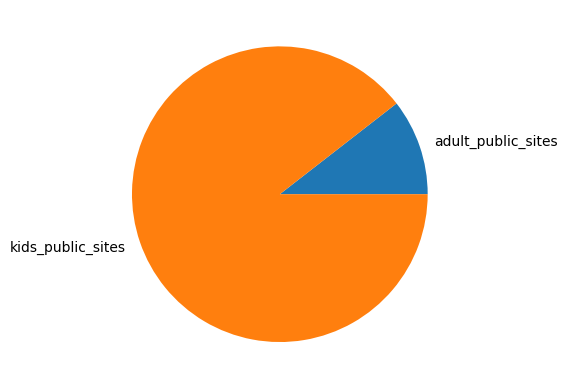

In [57]:
sizes = [adult_public_sites_count,kids_public_sites_count]
labels = ['adult_public_sites','kids_public_sites']
plt.pie(sizes, labels = labels)

**Interpretations**:
*   There are much more kids public sites than adults
*   Few reasons:
  *   The adult population is much smaller than the kids populaiton
  *   The adults are not free enough for those public sites for the sports, so no need to have as many. But for the senior centers, the families would maybe rather have the elders taken of themsevles isntead of senior centers (this is a weak claim however, beacuse the data covers other features as well)



